In [1]:
import quandl
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
quandl.ApiConfig.api_key = "qYgJiAYR3xYKtzNfAyx3"

In [3]:
data = quandl.get("USTREASURY/YIELD", limit=200)

In [4]:
data

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
2018-09-18,2.05,NaN,2.17,2.36,2.58,2.81,2.88,2.94,3.01,3.05,3.14,3.20
2018-09-19,2.03,NaN,2.16,2.36,2.58,2.81,2.89,2.96,3.04,3.08,3.16,3.23
2018-09-20,2.03,NaN,2.17,2.37,2.58,2.81,2.89,2.96,3.03,3.07,3.15,3.21
2018-09-21,2.05,NaN,2.18,2.38,2.58,2.81,2.89,2.95,3.03,3.07,3.14,3.20
2018-09-24,2.07,NaN,2.22,2.38,2.60,2.83,2.89,2.96,3.04,3.08,3.15,3.21
2018-09-25,2.12,NaN,2.21,2.38,2.59,2.83,2.91,2.99,3.06,3.10,3.17,3.23
2018-09-26,2.11,NaN,2.20,2.37,2.58,2.83,2.89,2.96,3.02,3.06,3.14,3.19
2018-09-27,2.10,NaN,2.18,2.37,2.58,2.83,2.89,2.96,3.02,3.06,3.13,3.19
2018-09-28,2.12,NaN,2.19,2.36,2.59,2.81,2.88,2.94,3.01,3.05,3.13,3.19


## Assumptions for calculating volatility


#### The specific transformations on interest rates to prepare it for calculating volatility
Volatility of interest rates is the standard deviation of the daily interest rates. For some reason, the logarithm is taken and this somehow helps with modelling continuous compounding.

$$ \text{pct_change}_t = \frac{interest_t}{interest_{t-1}} $$

$$ \text{rate} = ln(\text{pct_change}_t) $$

"rate" is the variable whose standard deviations represent the commonly used definition of volatility.


In [5]:
if len(data == 12):
    data.columns = ["1m", "2m", "3m", "6m", "1y", "2y", "3y", "5y", "7y", "10y", "20y", "30y"]

datapoints = len(data)


#Choose the data you want
data = data[["1y", "2y", "3y", "5y", "7y", "10y", "20y", "30y"]]

## Make a logarithmic return table to work out stdev assuming continuous returns
Rates_per_maturity = {}
Std_per_maturity = {}

for maturity in data.columns:
    Rates_per_maturity[maturity] = data[maturity][:-1].values /data[maturity][1:]
    Rates_per_maturity[maturity] = np.log(Rates_per_maturity[maturity])
    Std_per_maturity[maturity] = np.std(Rates_per_maturity[maturity])
    

In [9]:
sigma = Std_per_maturity['1y']

# What do we need?

### Binomial Interest Rate Trees

In order to build a tree, we need an estimate of volatility. For this we simply use the short rate volatility<sup>1, 2</sup>.

The following are the steps needed to create an interest rate tree.

**1. Complete the holes in the term structure:**
    
The term structure of interest rates is incomplete, with only select maturities being represented. We need to know the interest rate for all possible maturities in order to implement the model.
    
To this end, we use a "parametric" model developed due to Nelson and Siegel, described in [this BIS paper](https://www.bis.org/publ/bppdf/bispap25.pdf). The functional form of the model is
    
$$ s_m(t) = \beta_0 + (\beta_1 + \beta_2)(t/m)(1 - e^{-m/t}) + \beta_3(e^{-m/t}) $$
    
where $\beta_0, \beta_1, \beta_2, \beta_3$ are parameters to be estimated. The $s_m(t)$ is a function of time $t$, and is the spot (zero) yield curve. Using this functional form to fit the yield curve is technically incorrect, but good enough for us.
    
    
**2. Convert yields into spot rates** 

Each period will have a set of possible forward rates.

The forward rates differ from each other by a multiplicative factor of $ e^{2\sigma\sqrt{t}} $

We will work out the spot rates using a simple bootstrapping technique.

Let $ s_t $ be the spot rate at time t, and let $ y_t $ be the yield at time t.

A starting point is the obvious observation that on the run treasuries would trade at par, and also that 

$$ y_{0.5} = s_{0.5}. $$

Then,

$$ 1 = \frac{y_1/2}{(1+s_{0.5})^{0.5}} + \frac{1 + y_1/2}{(1+s_1)}. $$

And in general,

$$ 1 = \sum_{i=1}^{2n - 1} \frac{y_{n}/2}{(1+s_{i/2})^{i/2}} + \frac{1 + y_n/2}{(1 + s_n)^{n}} $$

The first term can be computed as long as all previous spot rates are known. The left hand side is also known. It is therefore possible by algebraic manipulation to get $ s_n $ for any n.

$$ 1 - \sum_{i=1}^{2n - 1} \frac{y_{n}/2}{(1+s_{i/2})^{i/2}} = \frac{1 + y_n/2}{(1 + s_n)^{n}} $$


$$ (1 + s_n)^{n} = \frac{1 + y_n/2}{1 - \sum_{i=1}^{2n - 1} \frac{y_{n}/2}{(1+s_{i/2})^{i/2}}} $$

We use this last formula to sequentially find spot rates for all 60 periods between 0.5 years and 30 years.

**3.**

#### Footnotes:

1- Short here means 1 year.


2- Trying to calculate volatility for further years would be too unwieldy and computatioanlly expensive.


## 1. Getting the complete term structure of yields

The functions to do this can be found in the imported ```interest_interpolation``` package.

In [10]:
import interest_interpolation as iri

terms_in_years = [int(i[:-1]) for i in data.columns]

params = iri.make_params(0.5, 0.5, 0.5, 1)
print(data.tail(1).values[0])

yield_function_params = iri.fit_parameters(list(terms_in_years), list(data.tail(1).values[0]))
yield_function = iri.yield_func
yield_plot = iri.plot_term

#print(yield_function_params)

[2.   1.92 1.88 1.88 1.96 2.07 2.34 2.54]
7.42690138576827
3.8410658897233647
2.3341159577292316
1.69465971867055
1.4146369667814414
1.2831500456894118
1.2131974281937608
1.1690042279172128
1.1358735123940749
1.1077597537832433
1.0821653562117781
1.058048230600481
1.0349642462086424
1.0127156070105579
0.9912065049681413
0.9703837554423529
0.9502123188068561
0.9306651685106255
0.9117190725516522
0.8933528197601325
0.8755464609582192
0.8582809737898625
0.8415381058606656
0.825300293845478
0.8095506155823199
0.7942727569299729
0.7794509855614058
0.765070128268774
0.7511155502443125
0.7375731356250008
0.7244292689559522
0.7116708173958823
0.6992851135678144
0.6872599389976779
0.675583508103732
0.664244452710679
0.6532318070684273
0.6425349933590427
0.6321438076775128
0.622048406473312
0.6122392934405663
0.6027073068451932
0.5934436072777727
0.5844396658211688
0.5756872526221677
0.567178425856518
0.5589055210769549
0.5508611409338888
0.5430381452585754
0.5354296414987015
0.5280289754964433


0.08230561085831123
0.08207504853923833
0.08184510960409522
0.08161579307143269
0.08138709795482607
0.08115902326294916
0.0809315679996438
0.08070473116399335
0.08047851175039136
0.0802529087486114
0.0800279211438785
0.07980354791693689
0.07957978804411764
0.07935664049740744
0.07913410424451753
0.07891217824894722
0.07869086147005386
0.0784701528631164
0.07825005137940183
0.07803055596622893
0.0778116655670345
0.07759337912143599
0.077375695565295
0.07715861383078079
0.0769421328464317
0.07672625153721868
0.0765109688246049
0.07629628362660756
0.07608219485785925
0.07586870142966666
0.07565580225006999
0.07544349622390356
0.07523178225285289
0.07502065923551322
0.07481012606744797
0.07460018164124424
0.07439082484657142
0.07418205457023597
0.0739738696962379
0.07376626910582615
0.07355925167755342
0.07335281628732987
0.07314696180847885
0.0729416871117882
0.07273699106556564
0.07253287253568926
0.07232933038566117
0.07212636347665899
0.07192397066758682
0.07172215081512659
0.071520902

0.023498778917553736
0.023444237811074204
0.02338986838437883
0.023335670087727668
0.02328164237303504
0.023227784693864266
0.02317409650542466
0.023120577264566764
0.023067226429779215
0.02301404346118444
0.02296102782053462
0.022908178971208247
0.02285549637820594
0.02280297950814627
0.022750627829262227
0.022698440811397377
0.02264641792600166
0.02259455864612739
0.02254286244642587
0.022491328803142925
0.022439957194115574
0.022388747098767033
0.022337697998104755
0.022286809374714122
0.022236080712756654
0.022185511497964522
0.022135101217637933
0.02208484936064002
0.02203475541739424
0.021984818879879423
0.021935039241625928
0.021885415997712827
0.02183594864476258
0.021786636680938234
0.02173747960593907
0.02168847692099661
0.021639628128871
0.021590932733847296
0.021542390241730845
0.021494000159844182
0.021445761997022993
0.021397675263612054
0.021349739471461154
0.021301954133921913
0.021254318765843154
0.02120683288356802
0.021159496004928623
0.02111230764924387
0.0210652673

0.010443354181848384
0.010428903259298464
0.010414493814250995
0.010400125712088471
0.01038579881863907
0.010371513000175553
0.010357268123413942
0.010343064055512002
0.01032890066406748
0.010314777817117076
0.010300695383134776
0.010286653231030621
0.01027265123014882
0.010258689250266899
0.010244767161593817
0.010230884834768878
0.010217042140860045
0.010203238951362692
0.010189475138198158
0.010175750573712214
0.010162065130674153
0.01014841868227466
0.010134811102124979
0.010121242264255249
0.010107712043113407
0.010094220313563447
0.01008076695088432
0.010067351830768359
0.01005397482932031
0.010040635823055394
0.01002733468889841
0.010014071304182328
0.010000845546646752
0.00998765729443652
0.009974506426100725
0.009961392820591181
0.009948316357261013
0.009935276915863466
0.009922274376550612
0.009909308619871732
0.009896379526772532
0.00988348697859324
0.009870630857067728
0.009857811044322116
0.009845027422873354
0.009832279875628241
0.009819568285881765
0.009806892537315736
0

0.006941822478255628
0.006936665165391209
0.006931519658564247
0.006926385921428082
0.006921263917755185
0.00691615361143765
0.006911054966485818
0.0069059679470284095
0.006900892517312339
0.0068958286417016065
0.006890776284677756
0.006885735410838588
0.006880705984898822
0.006875687971688598
0.006870681336153801
0.006865686043355685
0.006860702058470034
0.006855729346787192
0.00685076787371126
0.0068458176047605165
0.006840878505566061
0.006835950541871859
0.006831033679534651
0.006826127884523071
0.006821233122917753
0.006816349360910593
0.006811476564804293
0.006806614701012609
0.006801763736059221
0.00679692363657791
0.00679209436931193
0.006787275901113585
0.00678246819894412
0.006777671229873452
0.006772884961079034
0.006768109359846461
0.006763344393568469
0.006758590029745009
0.006753846235982369
0.006749112979993418
0.006744390229596825
0.006739677952716702
0.006734976117382774
0.006730284691729201
0.006725603643994989
0.006720932942523046
0.0067162725557602665
0.006711622452

0.004946026411317087
0.00494439552895282
0.004942766395024049
0.0049411390056049165
0.0049395133567815015
0.004937889444651582
0.004936267265324545
0.004934646814921726
0.004933028089575934
0.004931411085431548
0.0049297957986447795
0.004928182225383228
0.0049265703618259545
0.0049249602041635115
0.004923351748598001
0.004921744991342731
0.004920139928622553
0.004918536556673578
0.004916934871743153
0.00491533487008982
0.004913736547983506
0.0049121399017052845
0.004910544927547137
0.004908951621812557
0.004907359980815659
0.0049057700008818105
0.00490418167834762
0.0049025950095600915
0.004901009990877568
0.004899426618669198
0.00489784488931495
0.004896264799205701
0.004894686344742929
0.0048931095223388975
0.004891534328416807
0.004889960759410341
0.004888388811763728
0.0048868184819321585
0.004885249766381062
0.004883682661586533
0.004882117164035257
0.004880553270224157
0.004878990976660857
0.0048774302798632665
0.004875871176359717
0.004874313662688791
0.004872757735399351
0.0048

0.004298789890231835
0.004297708954321209
0.004296628734021715
0.004295549228331926
0.0042944704362531515
0.004293392356789219
0.004292314988946169
0.0042912383317327525
0.004290162384160067
0.004289087145241499
0.004288012613993153
0.004286938789433334
0.004285865670582957
0.004284793256465059
0.004283721546105368
0.00428265053853194
0.004281580232775127
0.004280510627867631
0.004279441722844754
0.004278373516743949
0.00427730600860512
0.004276239197470472
0.0042751730823845785
0.004274107662394459
0.004273042936549195
0.004271978903900575
0.00427091556350228
0.004269852914410599
0.004268790955684089
0.004267729686383467
0.004266669105571857
0.004265609212314605
0.0042645500056793986
0.004263491484736096
0.004262433648556895
0.004261376496216258
0.004260320026790738
0.004259264239359387
0.004258209133003196
0.004257154706805728
0.004256100959852457
0.004255047891231172
0.004253995500031935
0.004252943785346963
0.004251892746270613
0.0042508423818994594
0.004249792691332324
0.004248743

## A brief look at the interpolation quality

The following code uses the fitted model and compares the resulting yields to maturity against actual yields. There is some difference, especially towards the longer term maturities

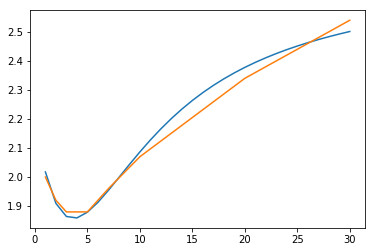

In [22]:
metadata = dict(zip(list(terms_in_years), list(data.tail(1).values[0]))) # sorry
yield_plot(yield_function_params, metadata)

times = [i/2 for i in range(1, 61)]
interpolated_yields = [yield_function(i, yield_function_params) for i in times]
interpolated_yields_dict = dict(zip(times, interpolated_yields))

In [19]:
dict(interpolated_yields_dict)

{0.5: 2.1054298663219297,
 1.0: 2.0174964702025937,
 1.5: 1.9536481841203268,
 2.0: 1.909253956586216,
 2.5: 1.880495318930755,
 3.0: 1.8642291316316444,
 3.5: 1.8578730646127364,
 4.0: 1.8593100887689022,
 4.5: 1.8668088611718616,
 5.0: 1.8789573937068886,
 5.5: 1.894607820063382,
 6.0: 1.9128304322993956,
 6.5: 1.9328754567360273,
 7.0: 1.9541412890384877,
 7.5: 1.9761481178313147,
 8.0: 1.9985160416402807,
 8.5: 2.0209469308597137,
 9.0: 2.043209409430447,
 9.5: 2.0651264338545072,
 10.0: 2.08656503331694,
 10.5: 2.10742784675739,
 11.0: 2.127646153018521,
 11.5: 2.1471741406102445,
 12.0: 2.1659842057735235,
 12.5: 2.1840631027507196,
 13.0: 2.2014087995989513,
 13.5: 2.218027917463537,
 14.0: 2.233933651752151,
 14.5: 2.2491440907799842,
 15.0: 2.2636808617475315,
 15.5: 2.277568045830739,
 16.0: 2.290831314097755,
 16.5: 2.3034972442433426,
 17.0: 2.3155927850241773,
 17.5: 2.3271448410140128,
 18.0: 2.3381799550681515,
 18.5: 2.3487240698515643,
 19.0: 2.3588023530780022,
 19.5:

## 2. Calculating spot rates

Given a complete structure of interest rates, we can now get the relevant spot rates that will be needed in calibrating the interest rate tree.

In [20]:
def get_prices(today_rates, select_maturities):
    prices = {}
    for maturity in select_maturities:
        rate = today_rates[maturity]
        rate = rate.values[0] ## turning a pd series into a single float
        len_maturity = int(maturity[:-1]) if "y" in maturity else int(maturity[:-1])/12 # casting maturity as a float in years
        
        if len_maturity < 2:
            price = 100/((1 + (rate/100))**(len_maturity))
        else:
            ## BEY basis
            # price = 100
            price = 100/((1 + (rate/100))**(len_maturity))
        prices[maturity] = price
    return prices

model_prices = get_prices(today_rates, select_maturities)
print(model_prices)

{'1m': 99.81068370504758, '2m': 99.62010287687943, '3m': 99.43555574440646, '6m': 98.9129844623792, '1y': 98.01038910124473, '2y': 96.3056201070726, '3y': 94.59345353650536, '5y': 90.9737280171222, '7y': 86.87699555985019, '10y': 80.83813590746001, '20y': 61.98756404840557, '30y': 46.02986386128046}


0.010087482351012969
2.0292179352090773
1.0292179352090773
0.010726456098482677
1.9982583222269585
0.5864793377820268
0.010642754306946202
1.975653371724057
0.4055793722604415
0.01051754132963092
1.9608712033891054
0.3091205114016191
0.010435718064814645
1.9524902030996831
0.24986456198703144
0.010402836083363192
1.9492138848417928
0.21008812463452853
0.010411754480562897
1.9499575233652566
0.1816974211781539
0.01045404869596117
1.9538298631185957
0.16049025660118343
0.010522191147391205
1.9601032782154555
0.14407841245476938
0.010609876603175781
1.968186121917317
0.13101034027980663
0.010711941087040051
1.9775991416488212
0.12035685942176744
0.010824201285109886
1.9879557616783137
0.11149810216943035
0.010943294069668614
1.998945695089911
0.10400634866912073
0.011066534801935963
2.0103213500996095
0.09757801163981128
0.011191796966884935
2.0218865647428146
0.09199235601583933
0.01131741142455074
2.033487277576783
0.08708549536813392
0.01144208263043298
2.045003807257413
0.082733487132

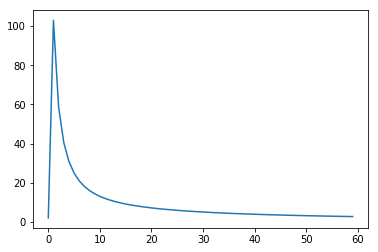

In [39]:
spot_rates = []

for time in times:
    yield_t = interpolated_yields_dict[time]
    if time == 0.5:
        spot_rates.append(yield_t)
    else:
        previous_times = [prev_time for prev_time in times if prev_time < time]
        sum_of_prev_bonds = sum([(yield_t/200)/((1 + spot_rates[i])**(i/2)) for i, _ in enumerate(spot_rates)]) # sorry
        print(sum_of_prev_bonds)
        compounded_spot = (1 + yield_t/2)/(1 - sum_of_prev_bonds)
        print(compounded_spot)
        uncompounded_spot = compounded_spot**(1/time) - 1
        print(uncompounded_spot)
        spot_rates.append(uncompounded_spot*100)
        
print(spot_rates)
plt.plot(spot_rates)

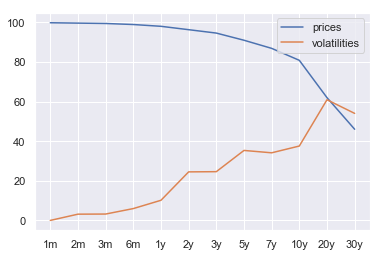

In [21]:
sns.set()
list_prices = [model_prices[i] for i in select_maturities]
list_vols = [model_volatilities[i]*100 for i in select_maturities]

plt.plot(select_maturities, list_prices, label="prices");
plt.plot(select_maturities, list_vols, label="volatilities");
plt.legend(loc="upper right");

[2.3  2.31 2.29 2.21 2.03 1.9  1.87 1.91 2.03 2.15 2.42 2.62] [0.08333333333333333, 0.16666666666666666, 0.25, 0.5, 1, 2, 3, 5, 7, 10, 20, 30]


(0, 30)

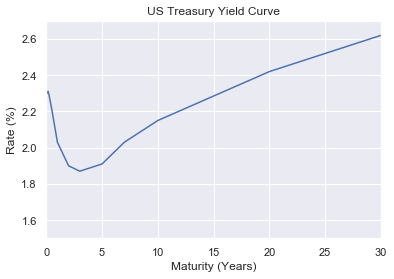

In [22]:
times = [int(i[:-1]) if i[-1] == "y" else float(int(i[:-1])/12) for i in data.columns]
print(today_rates.values[0], times)
sns.set()
sns.lineplot(times, today_rates.values[0])
plt.title("US Treasury Yield Curve")
plt.xlabel("Maturity (Years)")
plt.ylabel("Rate (%)")
## plt.savefig("Rates.png", dpi=1000)
plt.ylim(1.5, 2.7)
plt.xlim(0,30)

# Model Components

Having gotten all the required inputs, including calibrating treasury prices and their corresponding volatilities, we may proceed to construct a binomial interest rate tree. This will be done by means of a for loop, going through each of the maturity dates, and backpropogating to calibrate the forward rates.

Backpropogation is the heart of the procedure, the algorithm is as follows:

```Python3

def backprop(maturity_number, target_price):
    lowest = 0
    highest = 100
    mid = lowest + highest / 2
    price_at_mid = calc(mid, maturity_id):
    while abs(price_at_mid - target_price) < 0.0001:
        if price_at_mid > target_price:
            lowest = mid
            mid = .5 * (lowest + highest)
        else:
            highest = mid
            mid = .5 * (lowest + highest)
        price_at_mid = calc(mid, maturity_id)
    return mid
```

$ \text{calc(rate, maturity_id)} $ is supposed to be a way to work out the price given the interest rate generated from the iterative backprop algorithm. This should use some tree data structure for convenience

In [23]:
class Tree():
    def __init__(self, maturities, forwards, prices, volatilities):
        """
        Tree object is built around the maturtities given in it.
        """
        self.m = maturities
        self.f = forwards
        self.p = prices
        self.v = volatilities
        self.rates = dict({})
    def calculate_price(self, maturity, verbose=False):
        """
        Calculates the price given a set of forward rates, subject to maturities and forward lengths built into the tree object
        itself. 100 is always the starting price. It should be discounted by the rates into an appropriate price. This will be 
        compared to the actual prices.
        
        Args:
            maturity (int) : The index of the maturity
            
        Returns:
            price (float) : The price of the treasury given the forward rates in self.rates
        """
        start_price =  100
        
        # for each maturity we have, given its forward period and current rate, discount it to previous period.
        for index in range(maturity, 0, -1):
            if verbose:
                print(index - 1)
                print(self.f)
            forward_length = self.f[index - 1]
            current_rates = self.rates[self.m[index - 1]]
            
            # discounting
            prices_i = []
            for rate in current_rates:
                price = start_price/((1 + rate)**(forward_length/255))
                prices_i.append(price)
                factor = (1 + rate)**(forward_length/255)
            start_price = sum(prices_i)/len(prices_i)
        price = start_price
        return price
    
    def backprop(self):
        """
        Calibrates the interest rate tree, one step at a time.
        """
        def fill_rates_for_maturity(maturity_index, mid, vol):
            rates = []
            for i in range(0, maturity_index):
                rates.append(mid * np.exp(2 * i * vol))
            return rates
            
        for i in range(1, len(self.m) + 1):
            # interval bisection
            
            
            print("------------------------ \n")
            print(f"Node {i} of {len(self.m)}")
            print(self.m[i - 1], " : The maturity \n")
            print(self.v[self.m[i - 1]], " : The volatility at maturity \n")
            print("------------------------")
            
            # important variables
            
            high = 1
            low = 0
            mid = 0.5 * (low + high)
            
            vol = self.v[self.m[i - 1]]
            
            self.rates[self.m[i - 1]] = fill_rates_for_maturity(i, mid, vol)
            calculated_price = self.calculate_price(i)
            
            while abs(calculated_price - self.p[self.m[i - 1]]) > 0.00001:
                if calculated_price > self.p[self.m[i - 1]]:
                    low = mid
                    mid = 0.5 * (low + high)
                else:
                    high = mid
                    mid = 0.5 * (low + high)
                    
                self.rates[self.m[i - 1]] = fill_rates_for_maturity(i, mid, vol)
                calculated_price = self.calculate_price(i)
                
            ## diagnostics
            print("Results: ")
            print(calculated_price, " : Price which was calculated")
            print(self.p[self.m[i - 1]], " : Price that was target")
            print(self.rates[self.m[i - 1]], " : Rates in the tree for given maturities")


model_forwards = [Number_of_days[maturity] for maturity in forward_lengths]

t = Tree(select_maturities, model_forwards, model_prices, model_volatilities)
t.backprop()

------------------------ 

Node 1 of 12
1m  : The maturity 

0  : The volatility at maturity 

------------------------
Results: 
99.81069338192182  : Price which was calculated
99.81068370504758  : Price that was target
[0.022998809814453125]  : Rates in the tree for given maturities
------------------------ 

Node 2 of 12
2m  : The maturity 

0.03155726777003137  : The volatility at maturity 

------------------------
Results: 
99.62011112387866  : Price which was calculated
99.62010287687943  : Price that was target
[0.02246856689453125, 0.02393236773143179]  : Rates in the tree for given maturities
------------------------ 

Node 3 of 12
3m  : The maturity 

0.032163205885457534  : The volatility at maturity 

------------------------
Results: 
99.43555943807809  : Price which was calculated
99.43555574440646  : Price that was target
[0.021070480346679688, 0.022470412346015146, 0.023963356444292722]  : Rates in the tree for given maturities
------------------------ 

Node 4 of 12
6

In [24]:
t.rates

{'1m': [0.022998809814453125],
 '2m': [0.02246856689453125, 0.02393236773143179],
 '3m': [0.021070480346679688, 0.022470412346015146, 0.023963356444292722],
 '6m': [0.017650604248046875,
  0.019891728686023846,
  0.022417412149624737,
  0.025263785537112886],
 '1y': [0.011839628219604492,
  0.01450892703868435,
  0.017780031594682794,
  0.02178862176817346,
  0.026700967094934577],
 '2y': [0.0037859082221984863,
  0.006180791066202237,
  0.010090624484779848,
  0.016473733119634782,
  0.02689465684768001,
  0.04390762929698942],
 '3y': [0.0026915371417999268,
  0.004403442753301336,
  0.0072041762977995034,
  0.011786267935665957,
  0.01928271964884299,
  0.03154715971887216,
  0.05161218461150764],
 '5y': [0.0005997046828269958,
  0.0012157248621166676,
  0.0024645245946744816,
  0.004996098761343367,
  0.010128120809601258,
  0.02053178610630513,
  0.04162215761836486,
  0.08437668285839],
 '7y': [0.00047335773706436157,
  0.0009369103437195977,
  0.0018544135300558565,
  0.003670414

# Fin

### Comments & Bugs

1 - Do not appreciate the very difficult interface of interest rate tree. Maybe make a wrapper function around the calculate_price

2 - Do not know how to actually use Tree. Since most bonds don't neatly fit into these maturities, this model can't really be used to price them.
